<h1 style="color:navy;text-align: center;"><u><b>Airbnb Exploratory Data Analysis</b></u></h1>

Within this exploratory data analysis, I will be exploring the property sizes and property types available on Airbnb within New York City (NYC). As New York is a very built-up area, it is expected that the majority of properties will be smaller, accommodating 2-4 people, but is this really the case?

The questions I am focusing on within this EDA are:
* What property sizes and types are available in NYC?
* How does property size (number of bedrooms) compare to the number of people a property can accommodate?
* Are larger properties localised?
* Does property size effect availability?
* Is it more cost effective to get a larger property for large groups?

<h2 style="color:navy;text-align: center;">Importing data and checking variables</h2>

The data I will be using for this EDA is the 'Airbnb NYC' dataset, from: http://insideairbnb.com/get-the-data/ 
<br>This dataset contains information for 30,179 properties listed on airbnb, with 81 different variables stored in columns.

In [1]:
#importing useful libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [2]:
#importing the dataset as a pandas dataframe and checking it loads in correctly by checking first 5 rows and shape
listings = pd.read_csv("data/airbnb_nyc.csv")
listings.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [3]:
listings.shape

(30179, 81)

In [4]:
#Printing list of columns to determine which may be useful for EDA
listings.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


<h2 style="color:navy;text-align: center;"><b>Property Size and Property Type in NYC</b></h2>

To begin, I am exploring which <b>property type, room type</b> and <b>property size</b> are most common. To examine property size, I am exploring the number of bedrooms in a property, and the number of people a property accommodates - these are both very likely to be linked, and should work well as a representation of property size.

<h3 style="color:navy">Property Type</h3>

In [5]:
#First examining unique values in property type
property_type_count = listings['property_type'].value_counts()
property_type_count

Apartment                 24538
House                      2125
Condominium                 982
Townhouse                   772
Loft                        740
Serviced apartment          290
Hotel                       192
Guest suite                 137
Boutique hotel              104
Other                        65
Bed and breakfast            63
Hostel                       43
Resort                       25
Guesthouse                   24
Bungalow                     19
Aparthotel                   11
Villa                         9
Tiny house                    7
Earth house                   4
Cabin                         4
Cottage                       3
Casa particular (Cuba)        3
Tent                          3
Boat                          3
Yurt                          2
Farm stay                     2
Houseboat                     2
Cave                          2
Treehouse                     1
Dome house                    1
Castle                        1
Barn    

<h4 style="color:navy">Cleaning property_type:</h4>
As there are 17 different property types which have under 10 properties listed within the dataset, I am changing these to be included within the 'other' category. This allows the values to still be counted but will provide a more useful overview. It is also possible that not all of these small-count categories are accurate - <i>for example, is there really a castle to let in NYC?</i> <br>Incorporating these into the 'other' category will be more realistic and valuable.

In [6]:
#To make the above data more useful, any property_type with less than 10 will be added to 'other'
pt_var_remove = property_type_count.index[property_type_count < 10].tolist() #list of variables to change to other

#creating a dictionary to use with .replace function
var_remove_dict = {}
for i in pt_var_remove:
    var_remove_dict[i]="Other"

#replacing the noted property types to tidy data, note had to do this on original data set, not sliced
listings["property_type"] = listings["property_type"].replace(var_remove_dict)
property_type_count = listings["property_type"].value_counts()
print(property_type_count)

Apartment             24538
House                  2125
Condominium             982
Townhouse               772
Loft                    740
Serviced apartment      290
Hotel                   192
Guest suite             137
Other                   114
Boutique hotel          104
Bed and breakfast        63
Hostel                   43
Resort                   25
Guesthouse               24
Bungalow                 19
Aparthotel               11
Name: property_type, dtype: int64


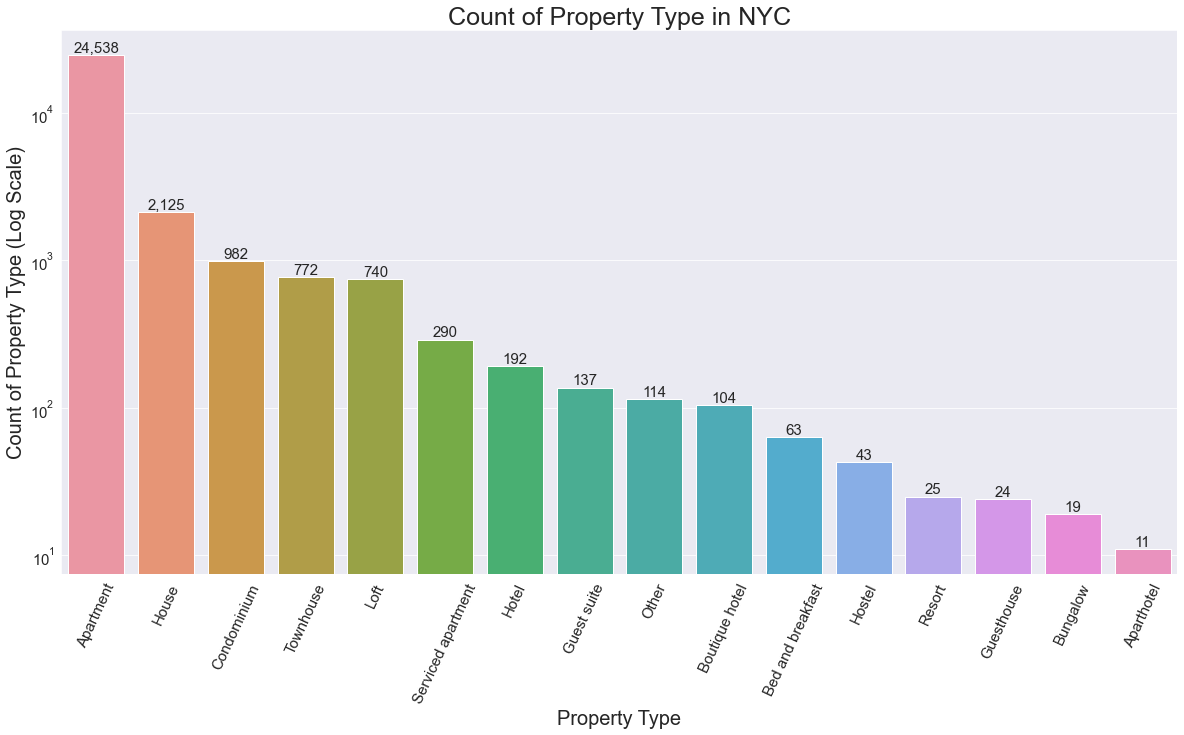

In [7]:
#Creating bar plot to show extreme variance in these
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=property_type_count.index, y=property_type_count)
plt.yscale('log')
ax.set_xlabel("Property Type", fontsize=20)
ax.set_ylabel("Count of Property Type (Log Scale)", fontsize=20)
ax.set_title("Count of Property Type in NYC", fontsize=25)
ax.bar_label(ax.containers[0], fontsize=15, fmt='{:,.0f}')
plt.xticks(rotation=65, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

As perhaps expected within a large city, the majority of properties available are <b>apartments</b>, covering <b>81.3%</b> of the airbnb market in NYC. 
<br> Houses are the second most common property type found in NYC, holding <b>7%</b> of the market, with a large variety of property types, including hotels, lofts, bed & breakfast, and hostels covering the remainder of the market.

<h3 style="color:navy;"> Room Type</h3>
As the majority of properties available are apartments and houses, it is expected that private rooms and whole apartments will dominate the airbnb market, with much fewer values for shared rooms coming from the remainder of the market (hostels etc.).

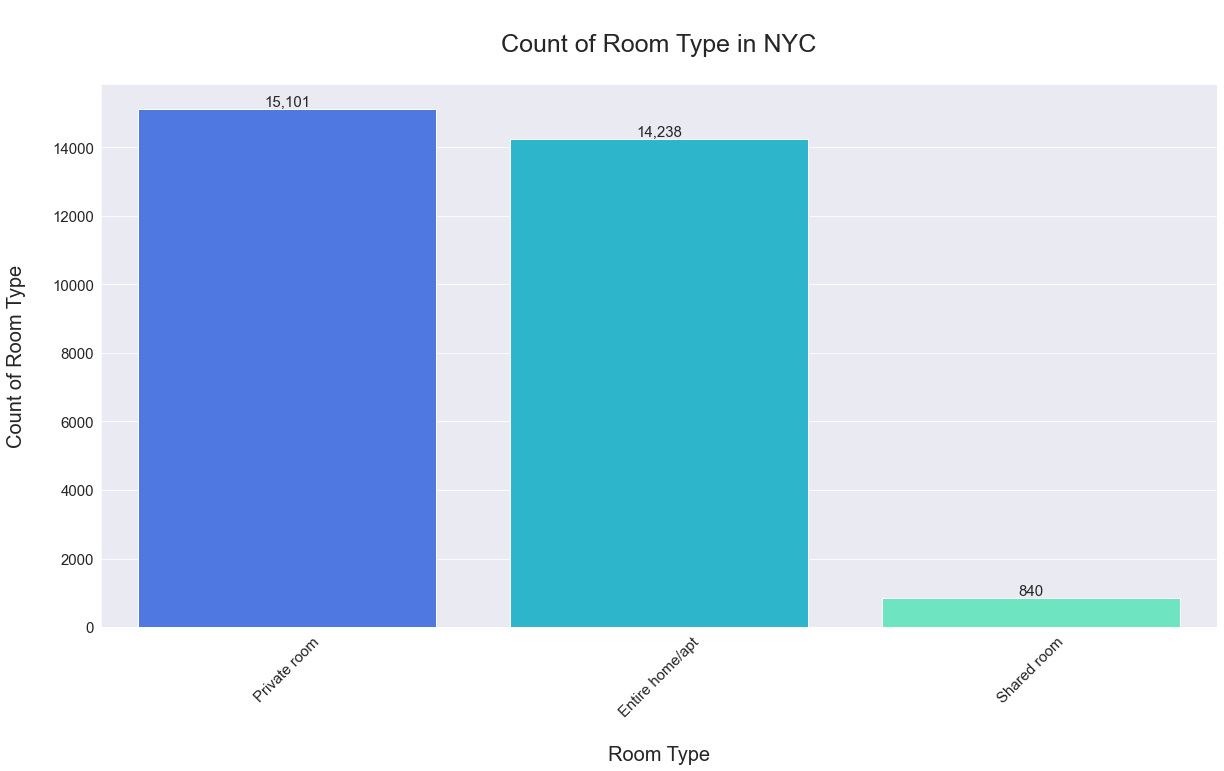

In [8]:
#Creating count plot to show these
palette = sns.color_palette("rainbow")
sns.set_palette(palette)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=listings, x='room_type')
ax.set_xlabel("\nRoom Type", fontsize=20)
ax.set_ylabel("Count of Room Type\n", fontsize=20)
ax.set_title("\nCount of Room Type in NYC\n", fontsize=25)
ax.bar_label(ax.containers[0], fontsize=15, fmt='{:,.0f}')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

As expected, the number of properties supplying shared rooms is minimal, covering only <b>2.8%</b> of all listings. 

<h3 style="color:navy;">Examining Property Size, using 'Accommodates' and 'Bedrooms'</h3>

Due to the size and costs of living in NYC, it is expected that most properties will be on the smaller side. To examine this, I will be looking at how many bedrooms each property has, and how many people each property accommodates. It is expected that most properties will have 1-2 bedrooms, and accommodate 2-4 people. <br>

Similarly to property type, the 'accommodates' and 'bedrooms' variables contain values which appear infrequently and would not provide a good overview of the data. For ease, these have been grouped into "9+" for people a property accommodates, and "5+" for number of bedrooms in a property.

<h4 style="color:navy">Property Size by 'Accommodates'</h4>

In [9]:
# Subsetting the data, and grouping any listings of 9-16 'accommodates' value
accommodates_count = pd.DataFrame(listings['accommodates'].value_counts()).sort_index()
accommodates_count.loc["9+"] = accommodates_count['accommodates'].loc[[9,10,11,12,13,14,15,16]].sum()
accommodates_count = accommodates_count.drop([9,10,11,12,13,14,15,16])

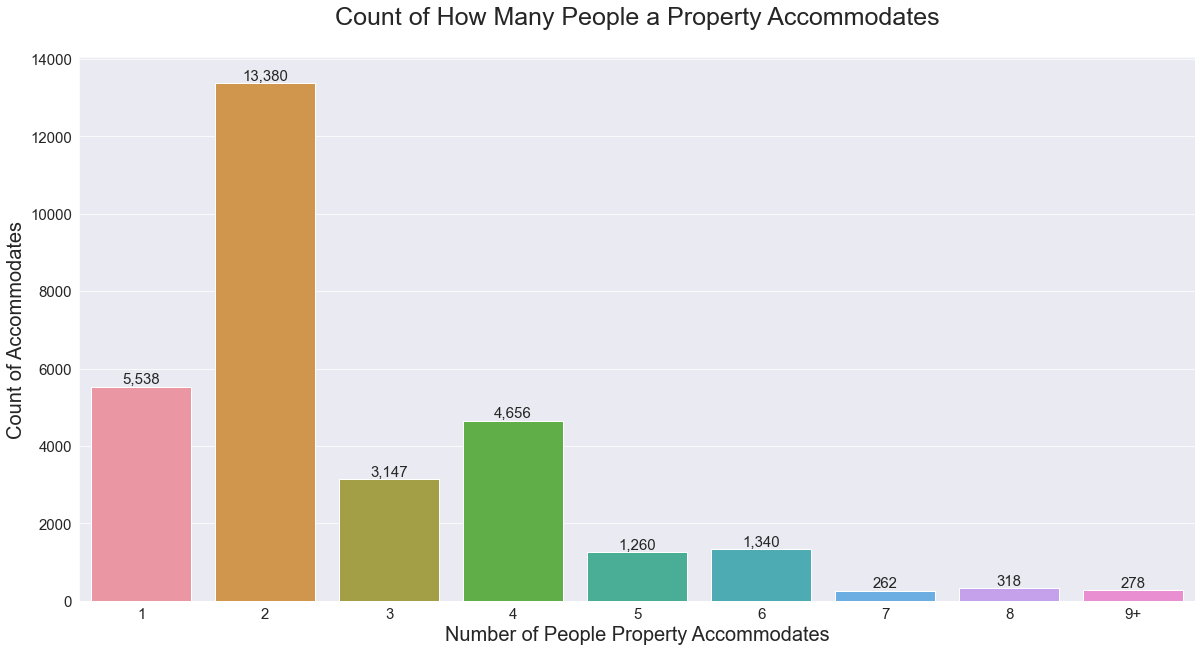

In [10]:
#Creating bar plot to show this data
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=accommodates_count.index, y=accommodates_count['accommodates'])
sns.set_style('darkgrid')
ax.set_xlabel("Number of People Property Accommodates", fontsize=20)
ax.set_ylabel("Count of Accommodates", fontsize=20)
ax.set_title("Count of How Many People a Property Accommodates\n", fontsize=25)
ax.bar_label(ax.containers[0], fontsize=15, fmt='{:,.0f}')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

As predicted, the above graph shows the majority of properties (<b>88.5%</b>) will accommodate 1-4 people, with larger properties being more scarce. <br>
The graph also shows an interesting trend in properties accommodating an even-number of people, showing often higher values than the previous odd-value. This is perhaps to be expected if most rooms contain double-beds, accommodating 2 people each, and reminds us that the 'accommodates' variable is a limit (accommodating "up to" x people) - not everyone wants to share a bed!

<h4 style="color:navy">Property Size by 'Bedrooms'</h4>

In [11]:
# Subsetting the data and grouping any listings of 5-11 bedrooms into "5+"
bedrooms_count = pd.DataFrame(listings['bedrooms'].value_counts()).sort_index()
bedrooms_count.loc["5+"] = bedrooms_count['bedrooms'].loc[[5, 6, 7, 8, 11]].sum()
bedrooms_count = bedrooms_count.drop([5, 6, 7, 8, 11])

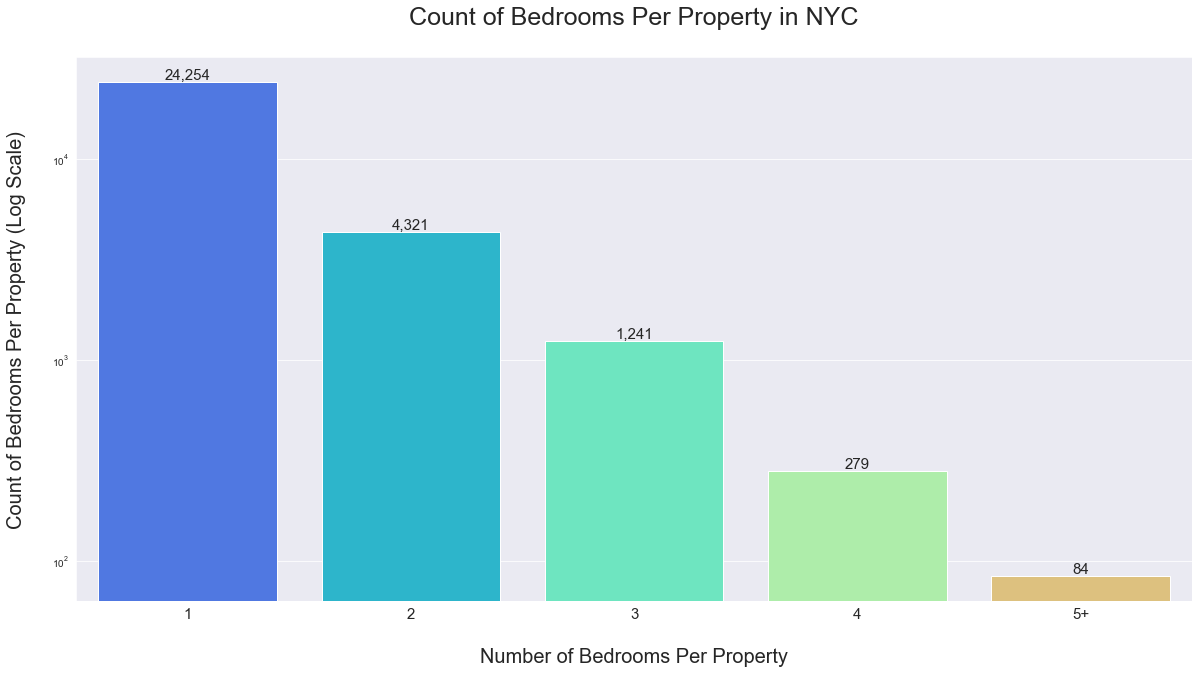

In [12]:
#Creating bar plot to show this
fig, ax =plt.subplots(figsize=(20,10))
ax = sns.barplot(x=bedrooms_count.index, y=bedrooms_count['bedrooms'])
sns.set_style('darkgrid')
ax.bar_label(ax.containers[0], fontsize=15, fmt='{:,.0f}')
plt.xlabel("\nNumber of Bedrooms Per Property", fontsize=20)
plt.ylabel("Count of Bedrooms Per Property (Log Scale)\n", fontsize=20)
plt.title("Count of Bedrooms Per Property in NYC\n", fontsize=25)
plt.xticks(fontsize=15)
plt.yscale('log')
plt.show()

Considering what was noted in the accommodates analysis (the majority of listings accommodating up to 2 people), it is no surprise that the majority of properties (<b>80.4%</b>) are formed of only 1 bedroom.

<h3 style="color:navy;">Conclusions of Property Type and Size in NYC</h3>
The above exploration matches the expected distribution of properties available for let on airbnb within a large, potentially expensive city such as New York City.
<br><br>

It has concluded that the majority of listings are:
* Apartments (81%)
* Private spaces (rooms or entire-homes) (97%)
* Likely to accommodate just 1-2 people (63%)
* Formed of just 1 bedroom (80%)

Folllowing these conclusions, I will be further examining the location of larger properties, correlations of property size and price/availability, and the value of larger properties.

<h2 style="color:navy;text-align: center;"><b>Are larger properties localised?</b></h2>

Considering how built-up New York City is, and that the majority of properties are apartments, and 1 bedroom, as shown in the previous analysis, it is possible that larger properties will be clustered together within the same area of the city.
Let's examine this!

In [13]:
#Setting up the heatmap
from folium.plugins import HeatMap
lat = listings['latitude'].median()
lon = listings['longitude'].median()
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=10, 
                         tiles="CartoDB positron")
#Adding 'bedrooms' as a variable for the 'heat'
folium_hmap.add_child(
    HeatMap(listings[['latitude', 'longitude', 'bedrooms']],
            radius=30, min_opacity=0.1, blur=20))

The above heatmap shows larger properties are quite <b>centralised</b> to the city, with two main hotspots on either side of the East River, near the <b>Williamsburg Bridge</b>. One particularly <b>strong</b> hostpot is located by the <b>Financial District</b>, which is likely a wealthy area. Some others are around <b>East Village and Alphabet City</b>, and <b>Hell's Kitchen and the Theater District</b> - the latter of which are likely popular tourist destinations.

<h2 style="color:navy;text-align: center;"><b>Considering correlation between 'accommodates', bedrooms, and availability</b></h2>

To add to the above analyses, I will be looking at the correlation between some variables I have explored already, considering the following points:
* Whilst it is expected that the number of people a property can accommodate will be directly related to how many bedrooms a property holds, is this really the case? 
* Does the size of a property cause it to be more expensive? 
* Does the size, or price, of a property affect it's availability?

I will explore these with a correlation heatmap.

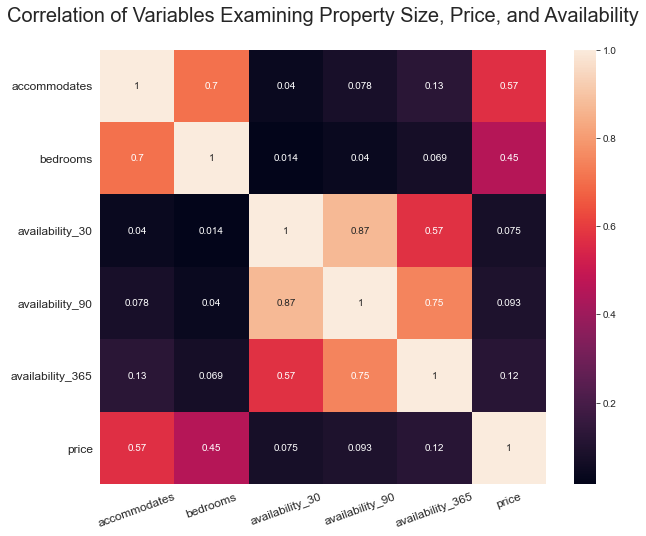

In [14]:
size_type_subset = listings[['accommodates', 'bedrooms', 'availability_30', 'availability_90', 'availability_365',
                            'price']]
plt.figure(figsize=(10,8))
sns.heatmap(size_type_subset.corr(), annot=True)
plt.title("Correlation of Variables Examining Property Size, Price, and Availability\n", fontsize=20)
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=20, fontsize=12)
plt.show()

<h3 style="color:navy">The above correlation heatmap has some interesting insights, which have been broken down by proposed question:</h3>

<h4 style="color:navy">Is it the case that the number of people a property can accommodate, is related to the number of bedrooms in a property?</h4>
Yes, the heatmap shows a strong positive correlation between these two variables. This concludes that more people are accommodated in properties with more bedrooms, which is what you would hope! It does confirm that people are generally not being squashed into rooms.

<h4 style="color:navy">How does property size effect price?</h4>
There are moderate-strong positive correlations shown between both the number of people a property accommodates, the number of bedrooms a property has, and the price the property is being let at. This is a logical correlation to see, as properties which are larger are likely to be let at a higher price. 

<h4 style="color:navy">Does property size or price effect the availability of a property?</h4>
There appear to be no trends between property size and if it is available within the next 30, 90, or 365 days. This suggests that a variety of property sizes are being let out. Similarly, there is no correlation between availability and price, although a very slight correlation is suggested between 365-day-availability, which may suggest the cheaper properties get booked out for longer periods of time, though it is unclear how accurate this availability variable is.

<h2 style="color:navy;text-align: center;"><b>Exploring Value for Money</b></h2>
Within this section, I will be exploring value for money. If booking for a large group of people, would it be more cost effective to book several smaller properties, or one larger property? <br>
To consider this, I will be creating new variables to explore 'price per bedroom', and 'price per person'. The 'price per person' variable will be calculated under the assumption that the maximum number of guests a property can accommodate will be present and paying for the letting. (For example, if a property accommodates 8 guests, 8 people will be paying for the property).

<h4 style="color:navy;">Cleaning Data for Price-Analysis:</h4>

In [15]:
# Create new variables: price per bedroom, price per accommodates
listings['price_per_bedroom'] = (listings['price']/listings['bedrooms'])
listings['price_per_accomm'] = (listings['price']/listings['accommodates'])

#Creating a subset of this data to clean for use in graphs
bed_accomm = listings[['price', 'bedrooms', 'accommodates','price_per_bedroom', 'price_per_accomm']]
bed_accomm.head()

,price,bedrooms,accommodates,price_per_bedroom,price_per_accomm
0,149,1,2,149.0,74.5
1,150,1,2,150.0,75.0
2,190,2,4,95.0,47.5
3,60,1,2,60.0,30.0
4,80,1,2,80.0,40.0


In [16]:
#Checking data for any 'price' = 0, so these can be removed from analyses
price_zero =bed_accomm[(bed_accomm['price_per_bedroom']==0)]
print(price_zero)

       price  bedrooms  accommodates  price_per_bedroom  price_per_accomm
12463      0         2             5                0.0               0.0
13911      0         1             2                0.0               0.0
13987      0         1             2                0.0               0.0
14002      0         1             4                0.0               0.0
14607      0         1             3                0.0               0.0
14621      0         1             3                0.0               0.0


In [17]:
#First removing data where price = 0 
bed_accomm=bed_accomm[(bed_accomm['price']!=0)]

#Data cleaning to match previous graphs: '5+' bedrooms grouped together, and '9+' accommodates grouped together
bed_accomm.loc[:,('bedrooms')] = bed_accomm.loc[:,('bedrooms')].replace({5:"5+", 6:"5+", 7:"5+", 8:"5+", 11:"5+"})
bed_accomm['bedrooms'].value_counts() #checking it worked

bed_accomm.loc[:,('accommodates')] = bed_accomm.loc[:,('accommodates')].replace({
    9:"9+", 10:"9+", 11:"9+", 12:"9+", 13:"9+", 14:"9+", 15:"9+", 16:"9+"})
bed_accomm['accommodates'].value_counts()

2     13378
1      5538
4      4655
3      3145
6      1340
5      1259
8       318
9+      278
7       262
Name: accommodates, dtype: int64

<h4 style="color:navy;">Examining Price Per Room</h4>

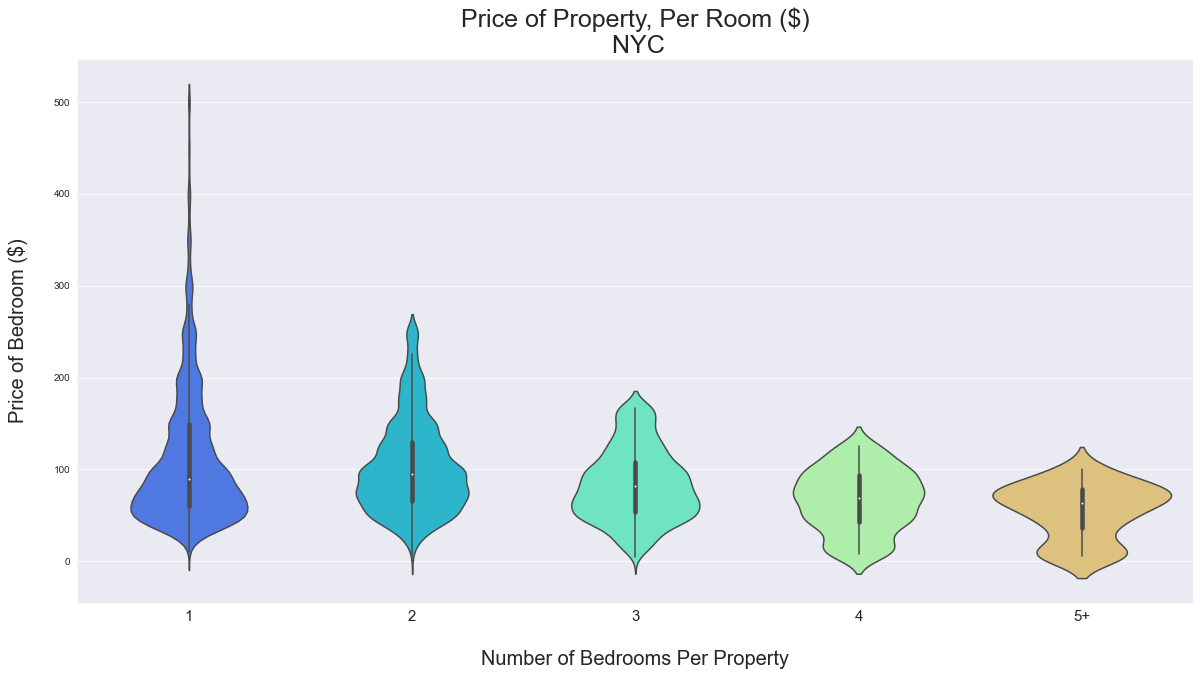

In [18]:
plt.figure(figsize=(20,10))
sns.violinplot(data=bed_accomm, x='bedrooms', y='price_per_bedroom', order=[1,2,3,4,"5+"])
sns.set_style('darkgrid')
plt.xlabel("\nNumber of Bedrooms Per Property", fontsize=20)
plt.ylabel("Price of Bedroom ($)\n", fontsize=20)
plt.title("Price of Property, Per Room ($)\n NYC", fontsize=25)
plt.xticks(fontsize=15)
plt.show()

As shown by the violin plot, the largest variance in price per room comes from the 1-bedroom properties. As the majority of the properties in NYC to let are only 1-bedroom, this is a logical output to expect, and they will likely vary a lot in comfort, style, and luxury. However, overall, this plot shows that the majority of properties cost similar amounts per room, with the interquartile ranges of every property size overlapping. 

<h4 style="color:navy;">Examining Price Per Person</h4>

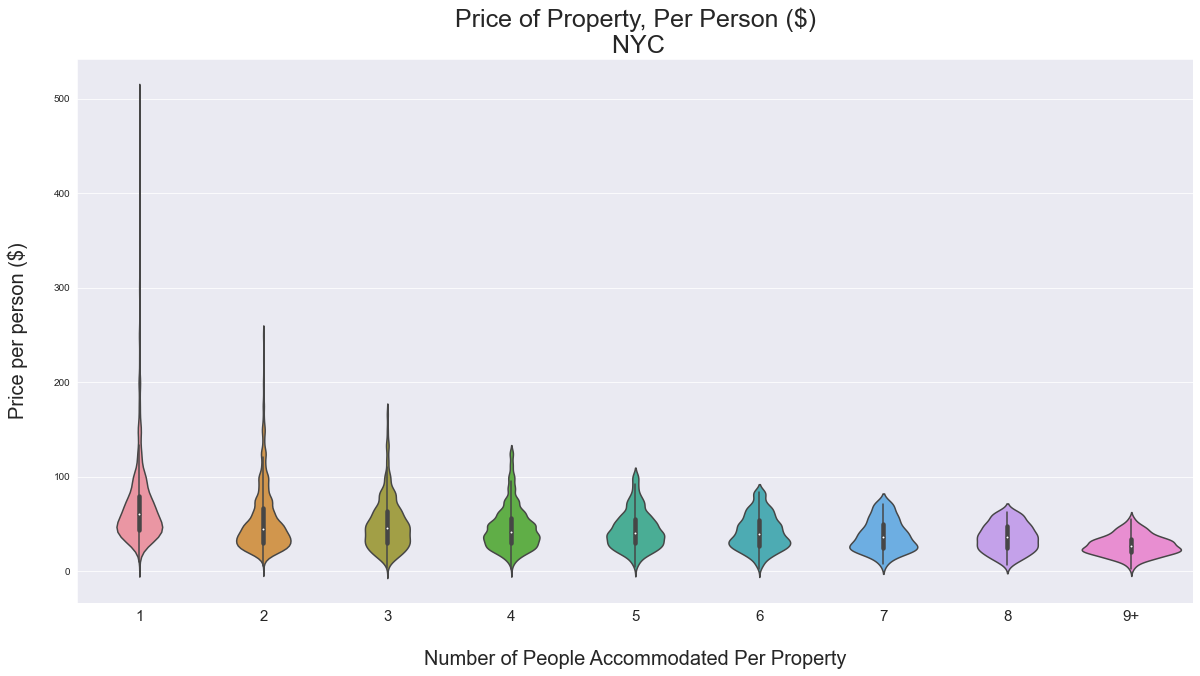

In [19]:
plt.figure(figsize=(20,10))
sns.violinplot(data=bed_accomm, x='accommodates', y='price_per_accomm', 
              order=[1,2,3,4,5,6,7,8,"9+"])
sns.set_style('darkgrid')
plt.xlabel("\nNumber of People Accommodated Per Property", fontsize=20)
plt.ylabel("Price per person ($)\n", fontsize=20)
plt.title("Price of Property, Per Person ($)\n NYC", fontsize=25)
plt.xticks(fontsize=15)
plt.show()

Similarly to the above plot, when examining price per person, the largest variance in price comes from the most commonly sized properties accommodating 1-2 people. Again, the interquartile ranges for each plot overlap, suggesting there is little difference in price per person for each sized properties.

As these plots show some similar results, let's take a closer look a the values.

<h4 style="color:navy;">Summary of Value Analysis</h4>

In [20]:
bed_accomm_price = bed_accomm[['price_per_accomm', 'price_per_bedroom']].describe()
print(bed_accomm_price)

bed_accomm_by_bed = bed_accomm.groupby(bed_accomm['bedrooms'])[['price_per_accomm', 'price_per_bedroom']].mean()
print(bed_accomm_by_bed)

bed_accomm_by_accomm = bed_accomm.groupby(bed_accomm['accommodates'])[['price_per_accomm', 'price_per_bedroom']].mean()
print(bed_accomm_by_accomm)

       price_per_accomm  price_per_bedroom
count      30173.000000       30173.000000
mean          53.644124         108.746083
std           33.756054          70.353788
min            1.785714           5.000000
25%           32.500000          60.000000
50%           45.000000          90.000000
75%           65.000000         140.000000
max          500.000000         500.000000
          price_per_accomm  price_per_bedroom
bedrooms                                     
1                55.116442         111.603324
2                49.731516         103.762616
3                42.971155          83.377115
4                39.586995          66.595878
5+               34.207454          55.009547
              price_per_accomm  price_per_bedroom
accommodates                                     
1                    69.209462          68.056537
2                    54.185454         106.796831
3                    49.943084         139.087626
4                    45.942374         13

<h3 style="color:navy;">Conclusions of Value for Money Analysis:</h3>
Whilst it is visible from the plots that there is very little difference in cost per bedroom or cost per person against the size of the property, there are a few key takeaways that can be seen from the summary statistics. 

<br>Key Conclusions:
* The mean cost <b>per person (\$54)</b> is approximately half the mean cost <b>per bedroom ($109)</b> - this is logical to see as the majority of properties can acommodate 2 people.
* The cost of <b>bedrooms</b> varies more than the cost <b>per person</b> - shown by a larger standard deviation. 
* As a large group (9+), it is more cost-efficient to get a property which accommodates more people, than to get several properties - however, this does not necessarily correlate to more bedrooms, so there may be some room-sharing involved!


<h2 style="color:navy;text-align: center;"><b>Is value-for-money localised?</b></h2>

We have seen previously that there are hotspots for larger properties. We have also seen that the largest variance in cost per bedroom is found in the smaller properties (1 bedroom). It would be interested to see if the more expensive properties (examining price per bedroom) follows the same trends as where the larger properties are.

In [21]:
from folium.plugins import HeatMap
lat = listings['latitude'].median()
lon = listings['longitude'].median()
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=10, 
                         tiles="CartoDB positron")
folium_hmap.add_child(
    HeatMap(listings[['latitude', 'longitude', 'price_per_bedroom']],
            radius=30, min_opacity=0.1, blur=20))

The above heatmap shows similar hotspots to those found previously when examining distribution of property size. There is once again a strong hotspot by the <b>Financial District</b>, which is assumed to be a wealthy area. Another hospot is found again near <b>Hell's Kitchen and the Theater District</b>, though this time the area is larger, and stronger towards <b>Central Park</b>, another tourist-heavy area.

<h1 style="color:navy;text-align: center;">Final Conclusions</h1>

Within this exploratory data analysis, I have focused on examining the size, type, and value of properties available to let on airbnb within New York City. The main conclusions from this analysis are:
* The majority of available properties to let are 1 bedroom, private, apartment-type properties, that can accommodate up to 2 people.
* A variety of property-sizes are being booked in NYC, and the cost of a property per person or per room is somewhat standardised no matter the size of the property.
* Larger and more expensive properties are more likely to be found in tourist areas such as the Theatre District, or wealthy areas such as the Financial District.

<h3 style="color:navy;">Future Exploratory Analysis</h3>
In future, it would be good to consider exploring the following questions:

* Amenities within NYC properties - on average how many does each property have, which are most/least common?
* Are more 'luxury' properties (e.g. more amenities) localised to certain areas?
* Explore what makes a property popular - is it the price, amenities, size, location?
* Are some hosts dominating the market in NYC? 